# Python Block Course
# Assignment 3: Importing, formatting and plotting data

Prof. Dr. Karsten Donnay, Stefan Scholz

Winter Term 2019 / 2020

In this third assignment we will practice how to build a data pipeline in Python. You can score up to 15 points in this assignment. Please submit your solutions inside this notebook in your repository on GitHub. The deadline for submission is on Thursday, October 17, 09:59 am. You will get individual feedback in your repository.

## 3.1 Tragedy of Titanic

During the maiden voyage of the RMS Titanic, she collided with an iceberg. Even though the Titanic was considered unsinkable, on April 15, 1912 she sank and tragically sweeped most of the passangers on board in their death. They only carried enough lifeboats for about half the number on board. Without a question, the sinking of the Titanic is one of the most infamous shipwrecks in history. 

The details of the passengers were carefully collected. The data shows, among other information, which passenger survived, which class he was in, which sex he had, and what age he was. 

First of all we are interested in finding out how good the chances of survival were between the different passangers on board. We will look at the relative chances of survival between sex, age and class. 

In the second step, we will conduct a logistic regression to predict who most likely survived given some characteristics. We will verify our predictions with the characters from the movie, Rose Dewitt Bukater played by Kate Winslet, and Jack Dawson played by Leonardo DiCaprio. 

<div class="alert alert-block alert-info">
    <b>Exercise (2 Points)</b>: Load a table with the data available <a href="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv">here</a>. Inspect the data and find out which variables have missing values.
</div>

In [2]:
import numpy as np
import pandas as pd

In [3]:
# import data
titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv", index_col=0)

In [4]:
len(titanic) # also shows how many rows the data has, shows the sample size

891

In [5]:
titanic.head() # gives information about the structure of the data

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
survived,,,,,,,,,,,,,,
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# find out which variables have missing values 
titanic.isnull().sum() # the command shows for which variables how many entroes are missing
# below are listed the variable were values are missing

# the missing variables are age, embarked, deck and embark_town

pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

You notice that there are e.g. some missing values in the variable age. But you want to use this variable in your later analysis, so you decide to use a median imputation for all missing values in the variable age. 

<div class="alert alert-block alert-info">
    <b>Exercise (1 Point)</b>: Impute all missing values in the variable age with its median.
</div>

In [7]:
# compute the medium of age seperately 

# step 1: create a data frame for age 
titanic = pd.DataFrame(titanic)#
# step 2: compute the median of age
print(titanic["age"].median())

28.0


In [8]:
titanic["age"].fillna(28, inplace=True) # replaces al Nan from before with median 28

<div class="alert alert-block alert-info">
    <b>Exercise (2 Points)</b>: Find the relative chances of survival for all sexes. Make a bar plot with the sexes and their relative chances of survival. Label your plot. 
</div>

In [9]:
from sklearn import linear_model

In [11]:
# counts gender and survivor or not survivor
titanic.groupby("sex").alive.value_counts() 

sex     alive
female  yes      233
        no        81
male    no       468
        yes      109
Name: alive, dtype: int64

In [12]:
# proportion of suvivors by gender 
titanic.groupby("sex").alive.mean()

DataError: No numeric types to aggregate

In [13]:
titanic.groupby(["sex","alive"]).mean()

pclass        age     sibsp     parch       fare  adult_male  \
sex    alive                                                                   
female no     2.851852  25.666667  1.209877  1.037037  23.024385    0.000000   
       yes    1.918455  28.716738  0.515021  0.515021  51.938573    0.000000   
male   no     2.476496  30.783120  0.440171  0.207265  21.960993    0.959402   
       yes    2.018349  27.382294  0.385321  0.357798  40.821484    0.807339   

                 alone  
sex    alive            
female no     0.333333  
       yes    0.424893  
male   no     0.741453  
       yes    0.587156

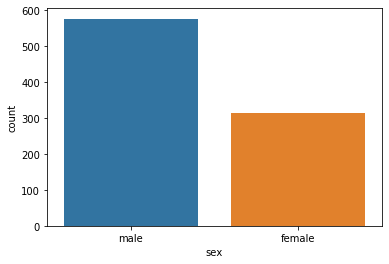

In [26]:
# create a count plot gender
sns.countplot(x="sex", data=titanic)

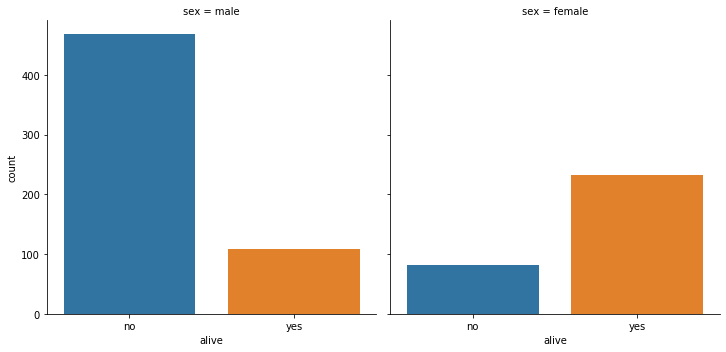

In [29]:
# gives plot for male and female and counts how many of each gender survived or died
sns.factorplot(x="alive", col="sex", kind="count", data=titanic)

In [30]:
# find proportion of survivers by gender
print(titanic[titanic.sex =="female"].alive.sum()/titanic[titanic.sex=="female"].alive.count())

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<div class="alert alert-block alert-info">
    <b>Exercise (2 Points)</b>: Find the relative chances of survival for all ages. Make a bar plot with age and their relative chances of survival. Bin age in categories of 10 years. Label your plot. 
</div>

In [137]:
# counts age and survivor or not survivor
titanic.groupby("age").alive.value_counts() 
# shows number of total suviors not the relative chance

age    alive
0.42   yes      1
0.67   yes      1
0.75   yes      2
0.83   yes      2
0.92   yes      1
1.00   yes      5
       no       2
2.00   no       7
       yes      3
3.00   yes      5
       no       1
4.00   yes      7
       no       3
5.00   yes      4
6.00   yes      2
       no       1
7.00   no       2
       yes      1
8.00   no       2
       yes      2
9.00   no       6
       yes      2
10.00  no       2
11.00  no       3
       yes      1
12.00  yes      1
13.00  yes      2
14.00  no       3
       yes      3
14.50  no       1
               ..
51.00  no       5
       yes      2
52.00  no       3
       yes      3
53.00  yes      1
54.00  no       5
       yes      3
55.00  no       1
       yes      1
55.50  no       1
56.00  no       2
       yes      2
57.00  no       2
58.00  yes      3
       no       2
59.00  no       2
60.00  no       2
       yes      2
61.00  no       3
62.00  no       2
       yes      2
63.00  yes      2
64.00  no       2
65.00  no      

In [25]:
titanic.groupby("age").mean() # gives relative share in %

,pclass,sibsp,parch,fare,adult_male,alone
age,,,,,,
0.42,3.000000,0.000000,1.000000,8.516700,0.000000,0.000000
0.67,2.000000,1.000000,1.000000,14.500000,0.000000,0.000000
0.75,3.000000,2.000000,1.000000,19.258300,0.000000,0.000000
0.83,2.000000,0.500000,1.500000,23.875000,0.000000,0.000000
0.92,1.000000,1.000000,2.000000,151.550000,0.000000,0.000000
1.00,2.714286,1.857143,1.571429,30.005957,0.000000,0.000000
2.00,2.600000,2.100000,1.300000,37.536250,0.000000,0.000000
3.00,2.500000,1.833333,1.333333,25.781950,0.000000,0.000000
4.00,2.600000,1.600000,1.400000,29.543330,0.000000,0.000000


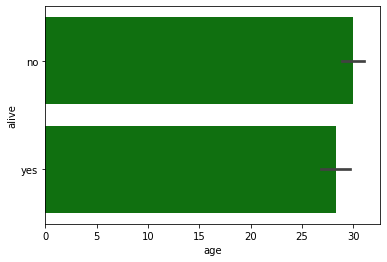

In [182]:
# create a bar graph for ages and their share of being alive ot dead
sns.barplot("age", "alive", data=titanic, color="green")
plt.show()

<div class="alert alert-block alert-info">
    <b>Exercise (2 Points)</b>: Find the relative chances of survival for all classes. Make a bar plot with class and their relative chances of survival. Label your plot. 
</div>

In [16]:
# counts age and survivor or not survivor 
titanic.groupby("pclass").alive.value_counts() 
# but counts absolute not relative

pclass  alive
1       yes      136
        no        80
2       no        97
        yes       87
3       no       372
        yes      119
Name: alive, dtype: int64

In [24]:
titanic.groupby("pclass").mean() # gives relative share in %

,age,sibsp,parch,fare,adult_male,alone
pclass,,,,,,
1,36.812130,0.416667,0.356481,84.154687,0.550926,0.504630
2,29.765380,0.402174,0.380435,20.662183,0.538043,0.565217
3,25.932627,0.615071,0.393075,13.675550,0.649695,0.659878


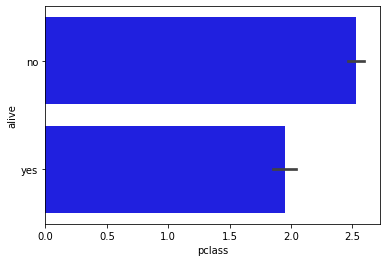

In [178]:
# create a bar graph for pc class and their share of being alive ot dead
sns.barplot("pclass", "alive", data=titanic, color="blue")
plt.show()

In the next step you want to perform a logistic regression. Using the variables explored so far, sex, age and class, you want to predict the chance of survival. However, you notice that the variables sex and class are coded as categorical variables and cannot be handled by a logistic regression, so you decide for a one-hot encoding. With one-hot encoding, each category of each previous variable gets its own variable and is then binary encoded. 

<div class="alert alert-block alert-info">
    <b>Exercise (2 Points)</b>: Encode the variables sex and class with one-hot encoding as separate variables in the dataset.
</div>

In [32]:
# encodes variable class with one hot code 
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

titanic["pclass"]=le.fit_transform(titanic["pclass"])

In [33]:
# encodes variable sex with one hot code
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

titanic["sex"]=le.fit_transform(titanic["sex"])

<div class="alert alert-block alert-info">
    <b>Exercise (2 Points)</b>: Conduct a logistic regression with sex, age and class (one-hot encoded) on survival. Test the correctness of your regression by calculating the accuracy on your dataset. 
</div>

In [18]:
import matplotlib.pyplot as plt
import seaborn as  sns

In [39]:
# define input, we want age, class and sex as input so column 1- 3
# define the columns that will be in the input 
col = titanic[["sex", "age", "pclass"]]
one_hot_encoded_titanic_predictors = pd.get_dummies(col)
one_hot_encoded_titanic_predictors.head()

# define input depending on column
x = one_hot_encoded_titanic_predictors

# define output, we want suvivor so we want the column alive colum 14 
y = titanic["alive"]

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x,y)

C:\Users\yeliz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Finally, you want to know what your model predicts for the two main characters in the movie Titanic. The character Rose Dewitt Bukater is played by Kate Winslet and is 17 years old, female and in first class. The character Jack Dawson is played by Leonardo DiCaprio and is 20 years old, male and in third class. 

<div class="alert alert-block alert-info">
    <b>Exercise (2 Points)</b>: Predict whether Rose or Jack survive using your logistic regression model. 
</div>

In [43]:
# predict Rose
# define the columns that will be in the input 
col = titanic[["sex"=="female", "age"==17, "pclass"==1]]
one_hot_encoded_titanic_predictors = pd.get_dummies(col)
one_hot_encoded_titanic_predictors.head()

# define input depending on column
x = one_hot_encoded_titanic_predictors

# define output, we want suvivor so we want the column alive colum 14 
y = titanic["alive"]

ValueError: Item wrong length 3 instead of 891.

In [44]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x,y)

C:\Users\yeliz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)